### 数据分组和使用点阵图  
探索性数据分析中，可以使用点阵图。所谓点阵图，就是将数据分成多个组绘制在一定的范围内  


In [1]:
# 加载库
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
from matplotlib.pylab import frange

In [2]:
# 装载数据，处理丢失的数据
fill_data = lambda x :int(x.strip() or 0)
data = np.genfromtxt('president.txt',dtype=(int,int),converters={1:fill_data},delimiter=',')
x = data[:,0]
y = data[:,1]

In [3]:
# 采用频率（独立的点的个数）对数据进行分组
# 给定一些点，Counter()返回一个字典，键是数据点，值是数据点在数据集中的频率。
x_freq = Counter(y)
x_ = np.array(x_freq.keys())
y_ = np.array(x_freq.values())

In [7]:
print x_freq

Counter({11: 3, 13: 3, 14: 3, 16: 3, 17: 3, 20: 3, 0: 2, 5: 2, 8: 2, 18: 2, 19: 2, 21: 2, 23: 2, 25: 2, 26: 2, 27: 2, 6: 1, 7: 1, 9: 1, 22: 1, 24: 1, 28: 1, 30: 1, 31: 1, 32: 1, 34: 1, 38: 1, 39: 1, 41: 1, 54: 1})


In [4]:
# 采用年份范围进行分组
x_group = OrderedDict()
group = 5
group_count = 1
keys = []
values = []
for i,xx in enumerate(x):
    keys.append(xx)
    values.append(y[i])
    if group_count == 5:
        x_group[tuple(keys)]= values
        keys = []
        values = []
        group_count = 1
    group_count +=1
    
x_group[tuple(keys)] = values
print x_group

OrderedDict([((1946, 1947, 1948, 1949, 1950), [41, 23, 16, 28, 20]), ((1951, 1952, 1953, 1954), [11, 19, 14, 39]), ((1955, 1956, 1957, 1958), [32, 0, 14, 0]), ((1959, 1960, 1961, 1962), [16, 6, 25, 24]), ((1963, 1964, 1965, 1966), [18, 17, 38, 31]), ((1967, 1968, 1969, 1970), [27, 26, 17, 21]), ((1971, 1972, 1973, 1974), [20, 17, 23, 16]), ((1975, 1976, 1977, 1978), [13, 13, 21, 11]), ((1979, 1980, 1981, 1982), [13, 11, 8, 8]), ((1983, 1984, 1985, 1986), [14, 9, 7, 5]), ((1987, 1988, 1989, 1990), [5, 54, 34, 18]), ((1991, 1992, 1993, 1994), [20, 27, 30, 22]), ((1995, 1996, 1997), [25, 19, 26])])


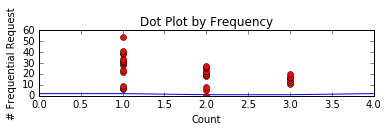

In [6]:
# 绘制分组数据的点阵图
plt.subplot(311)
plt.title("Dot Plot by Frequency")
plt.plot(y_,x_,'ro')
plt.xlabel('Count')
plt.ylabel('# Frequential Request')
plt.xlim(min(y_)-1,max(y_)+1)
plt.show()